# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [2]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Admin\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [4]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [5]:
# raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values='?', sep= ' ', comment = '\t', skipinitialspace = True)
# raw_dataset

In [6]:
raw_dataset = pd.read_fwf(dataset_path, names = column_names)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [7]:
dataset = raw_dataset.copy()

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
dataset.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,"""ford pinto"""
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


### Limpia los datos

Trata los missings y variables categóricas

In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [11]:
dataset = dataset[dataset['Horsepower']!='?']
dataset['Horsepower'] = dataset['Horsepower'].astype(float)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Car Name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [13]:
dataset.drop(['Car Name'], inplace=True, axis=1)

In [14]:
np.unique(dataset['Origin'])

array([1, 2, 3], dtype=int64)

In [15]:
raw_dataset.groupby('Origin')['Car Name'].describe()

,count,unique,top,freq
Origin,,,,
1,249,187,"""ford pinto""",6
2,70,58,"""peugeot 504""",4
3,79,60,"""toyota corolla""",5


In [16]:
# se puede hacer con get_dummies
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [17]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [18]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [19]:
train_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

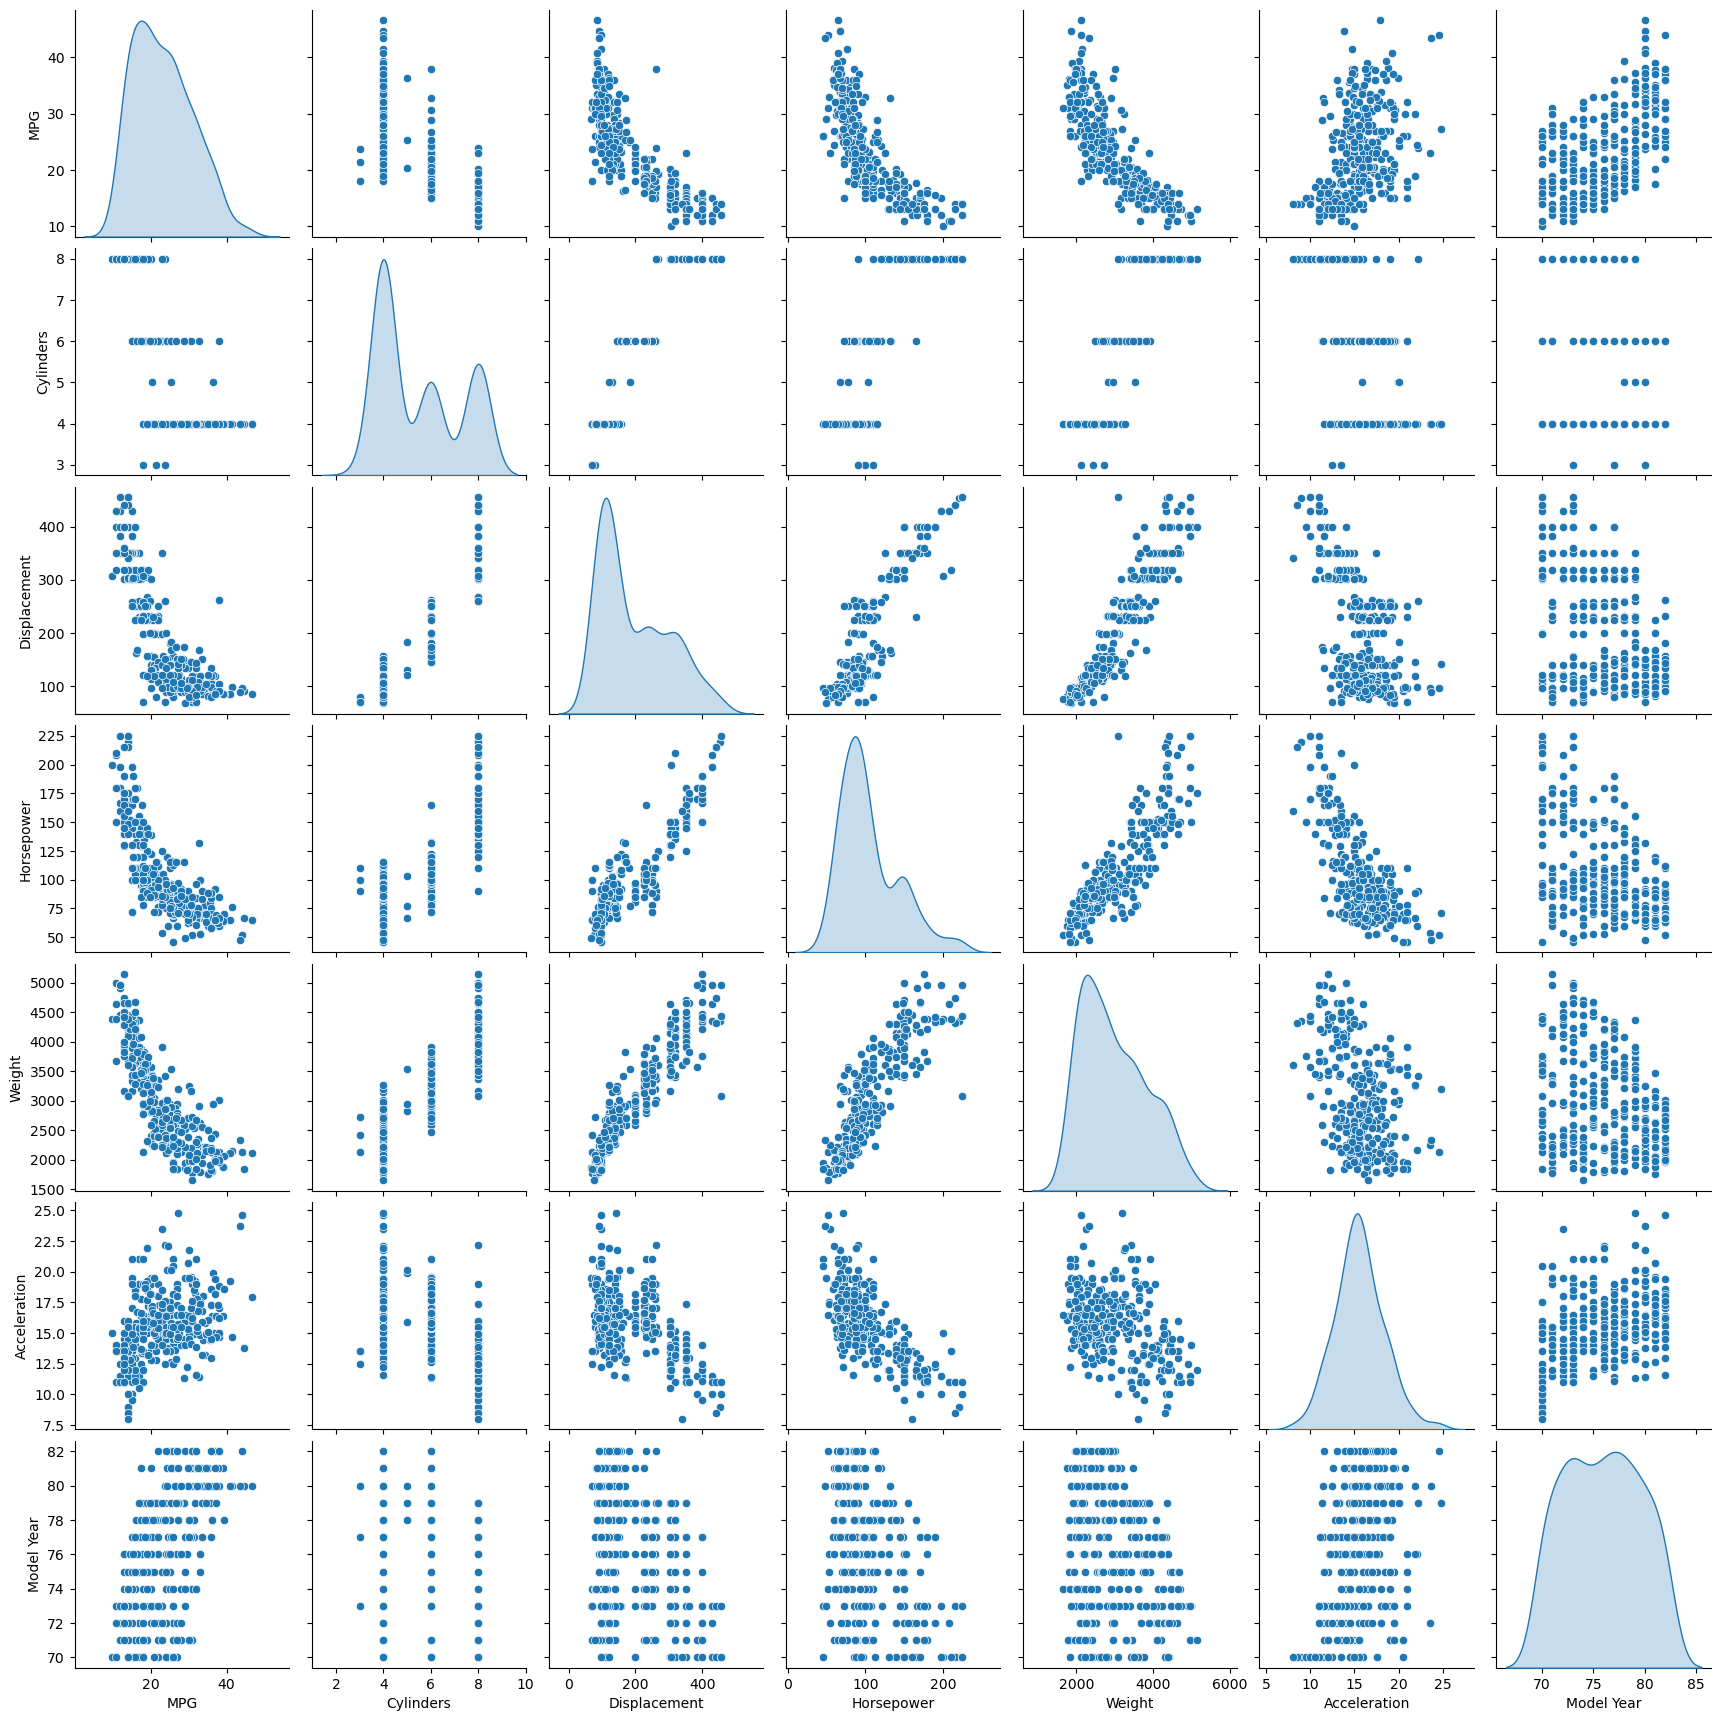

In [20]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year']], diag_kind = 'kde')

Tambien revise las estadisticas generales:

In [21]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [22]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Separa las features del target

Separe el target de las features.

In [23]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [24]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(314, 9)
(78, 9)


Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [25]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [26]:
normed_train_data.shape[1:]

(9,)

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (normed_train_data.shape[1:])),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(loss ='mse',
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics = ['mae','mse'])

In [28]:
9*64+64

640

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [29]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [30]:
history = model.fit(
    normed_train_data,
    train_labels,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0
)

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [31]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,572.688110,22.620014,572.688110,569.808716,22.500010,569.808716,0
1,526.099609,21.576427,526.099609,523.077148,21.447660,523.077148,1
2,479.394623,20.476896,479.394623,470.488678,20.185745,470.488678,2
3,427.725708,19.186852,427.725708,412.393860,18.705887,412.393860,3
4,372.114563,17.702362,372.114563,351.498657,17.013916,351.498657,4
...,...,...,...,...,...,...,...
995,2.664824,1.062017,2.664824,10.159695,2.463723,10.159695,995
996,2.929404,1.152780,2.929404,10.286960,2.471085,10.286960,996
997,2.612483,1.036600,2.612483,10.177381,2.445132,10.177381,997
998,2.798591,1.114986,2.798591,10.159439,2.427640,10.159439,998


In [32]:
df_hist.head(50)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,572.688110,22.620014,572.688110,569.808716,22.500010,569.808716,0
1,526.099609,21.576427,526.099609,523.077148,21.447660,523.077148,1
2,479.394623,20.476896,479.394623,470.488678,20.185745,470.488678,2
3,427.725708,19.186852,427.725708,412.393860,18.705887,412.393860,3
4,372.114563,17.702362,372.114563,351.498657,17.013916,351.498657,4
5,314.480835,16.029268,314.480835,288.649841,15.145446,288.649841,5
6,256.804138,14.222875,256.804138,229.057449,13.293379,229.057449,6
7,201.784637,12.430780,201.784637,171.751144,11.401112,171.751144,7
8,150.557938,10.536996,150.557938,121.754234,9.484820,121.754234,8
9,106.977913,8.651126,106.977913,82.664284,7.648525,82.664284,9


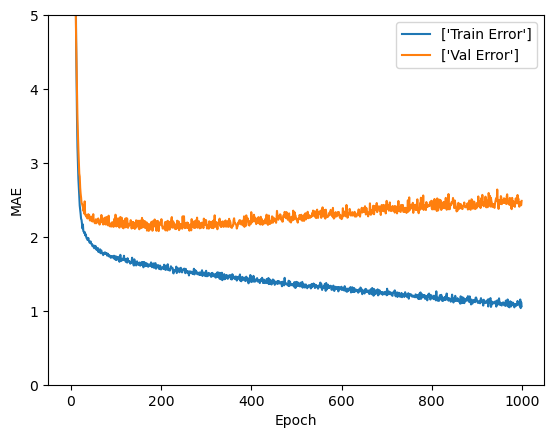

In [33]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
plt.ylim([0,5])
plt.legend()

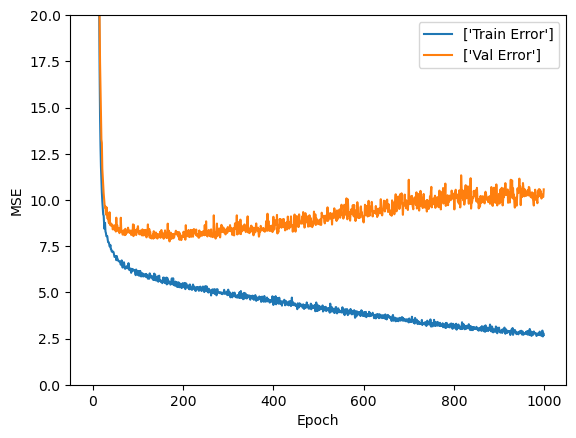

In [34]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [35]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

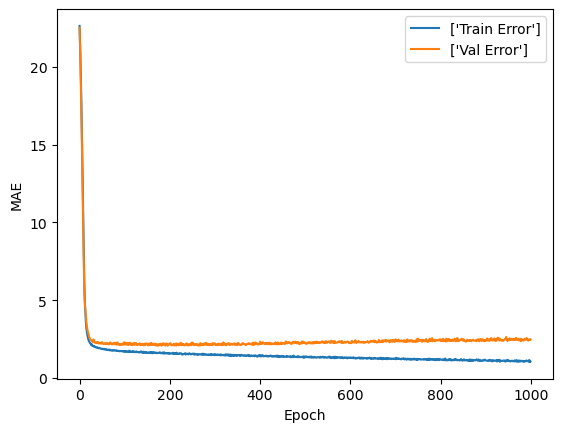

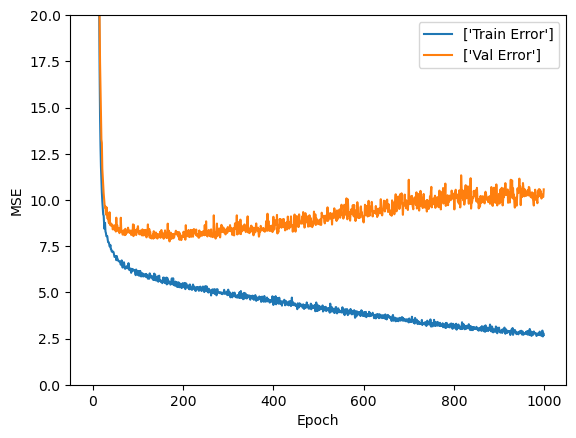

In [36]:
plot_history(history)

¿Alguna conclusión respecto a este gráfico?

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

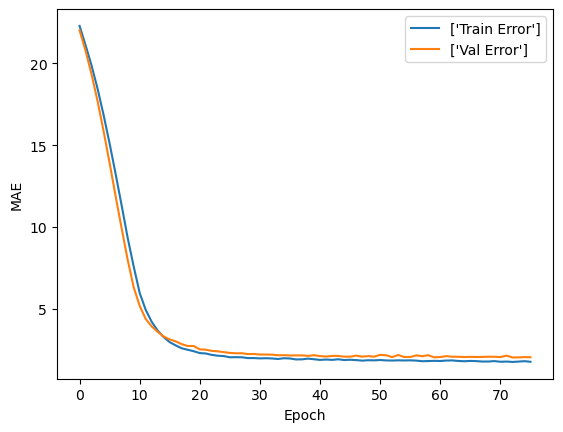

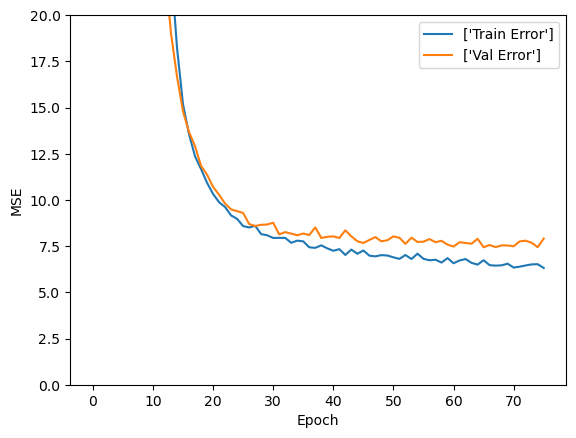

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (normed_train_data.shape[1:])),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(loss ='mse',
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics = ['mae','mse'])

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

plot_history(history)

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [38]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 [==============================] - 0s 13ms/step - loss: 6.6944 - mae: 2.0449 - mse: 6.6944


2.0448803901672363

In [39]:
model.save("my_keras_model_MAE_1_96.keras")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [40]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 [==============================] - 0s 151ms/step


array([[30.007574],
       [24.888132],
       [13.072313],
       [38.318966],
       [36.221607],
       [21.077812],
       [38.308926],
       [31.847376],
       [19.334196],
       [24.949253]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 [==============================] - 0s 7ms/step


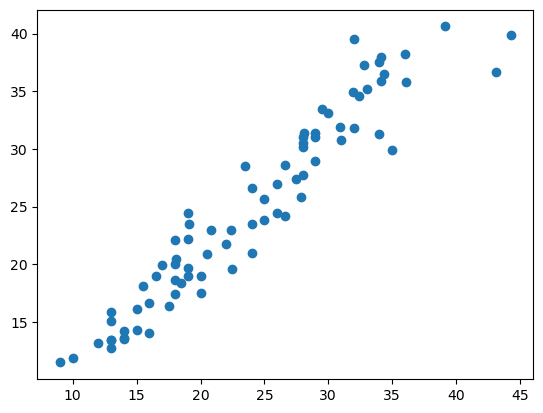

In [41]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

(array([ 2.,  1.,  5.,  6., 19., 12., 24.,  6.,  2.,  1.]),
 array([-6.45478592, -5.05424103, -3.65369614, -2.25315125, -0.85260635,
         0.54793854,  1.94848343,  3.34902832,  4.74957321,  6.1501181 ,
         7.55066299]),
 <BarContainer object of 10 artists>)

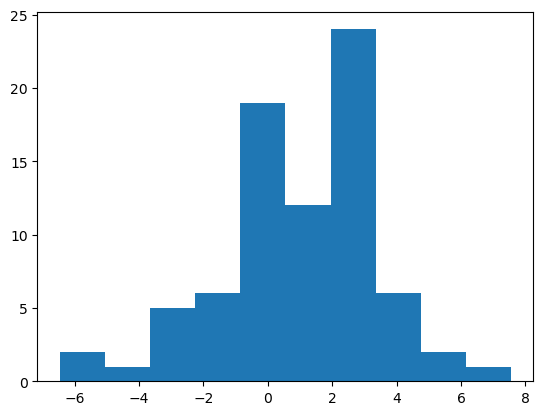

In [42]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [43]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.keras")

test_predictions = model_loaded.predict(normed_test_data).flatten()

3/3 [==============================] - 0s 0s/step


In [44]:
test_predictions

array([16.142149, 11.905714, 11.491809, 23.827667, 22.213552, 13.502977,
       13.611474, 13.473222, 20.054134, 29.921797, 25.640772, 24.475368,
       15.105867, 27.774439, 12.717079, 14.24413 , 14.334005, 13.428087,
       18.677433, 13.209411, 14.039544, 26.627636, 19.64659 , 21.011877,
       30.772795, 24.461971, 16.608923, 23.5308  , 17.394205, 18.982847,
       28.968786, 22.098127, 19.025679, 21.725   , 26.938765, 16.403238,
       19.599594, 31.068905, 31.360136, 17.508764, 31.789274, 30.127178,
       15.839618, 36.645214, 35.785065, 37.229744, 20.876997, 22.929674,
       20.42433 , 27.418768, 31.923273, 19.97578 , 33.494324, 18.98656 ,
       18.100616, 18.343233, 34.965233, 35.88069 , 23.456915, 25.848993,
       39.841732, 34.60078 , 28.63101 , 28.497095, 33.101223, 40.608856,
       37.997494, 36.52603 , 35.23247 , 31.344633, 22.979338, 24.175827,
       30.505129, 31.333523, 38.24191 , 37.536022, 39.550663, 31.071188],
      dtype=float32)